# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv("rock_density_xray.csv")

In [168]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [169]:
df.columns=['Signal',"Density"]

<Axes: xlabel='Signal', ylabel='Density'>

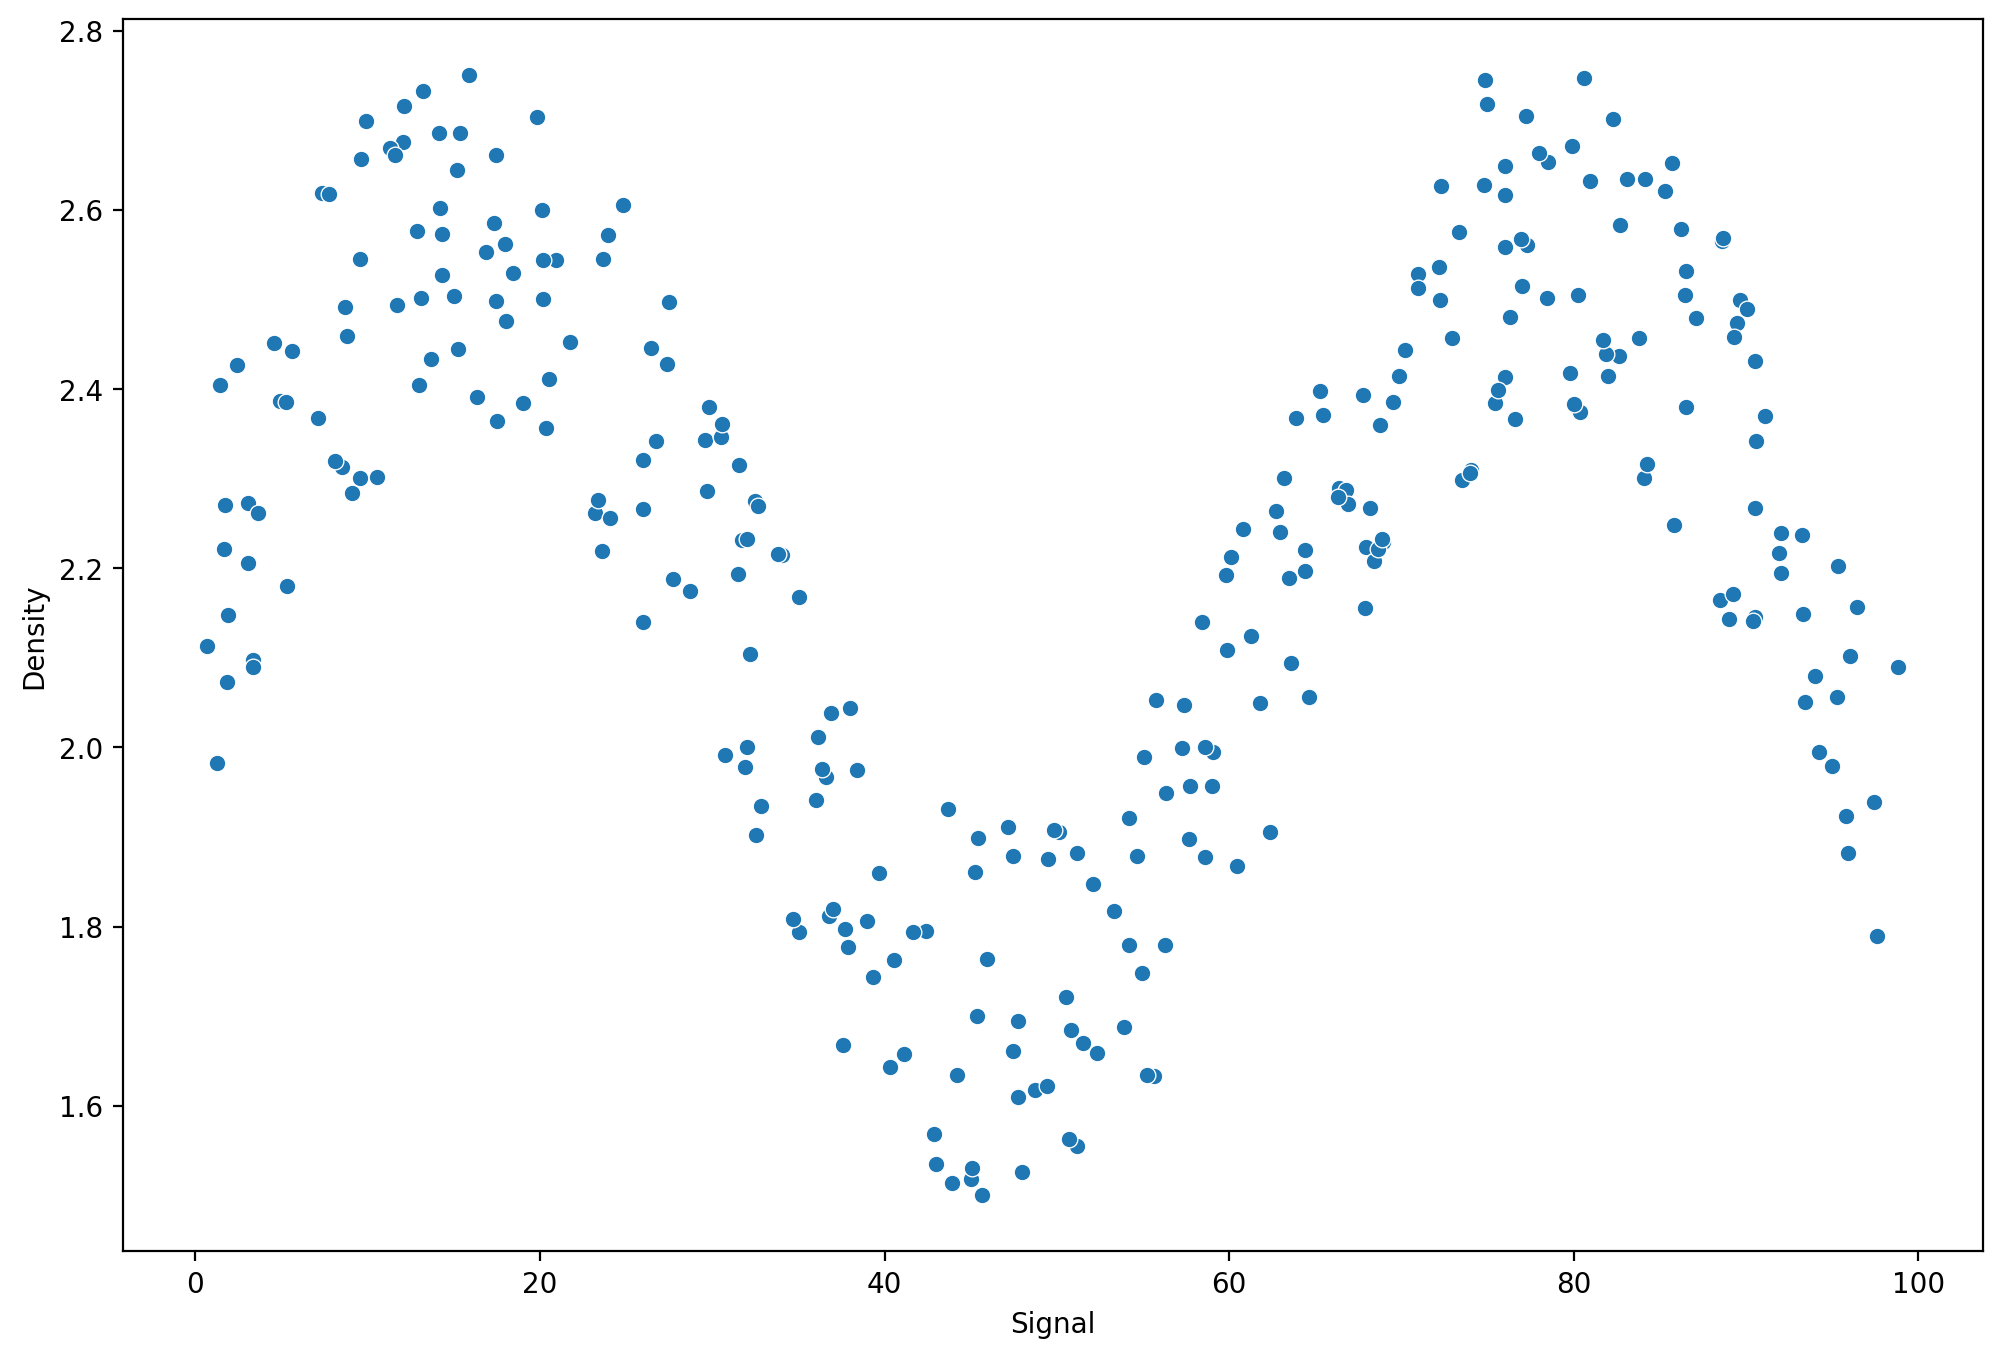

In [170]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

---
---

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [171]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

-----

# Linear Regression

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
lr_model = LinearRegression()

In [176]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [177]:
lr_preds = lr_model.predict(X_test)

In [178]:
from sklearn.metrics import mean_squared_error

In [179]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

What does the fit look like?

In [180]:
signal_range = np.arange(0,100)

In [181]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

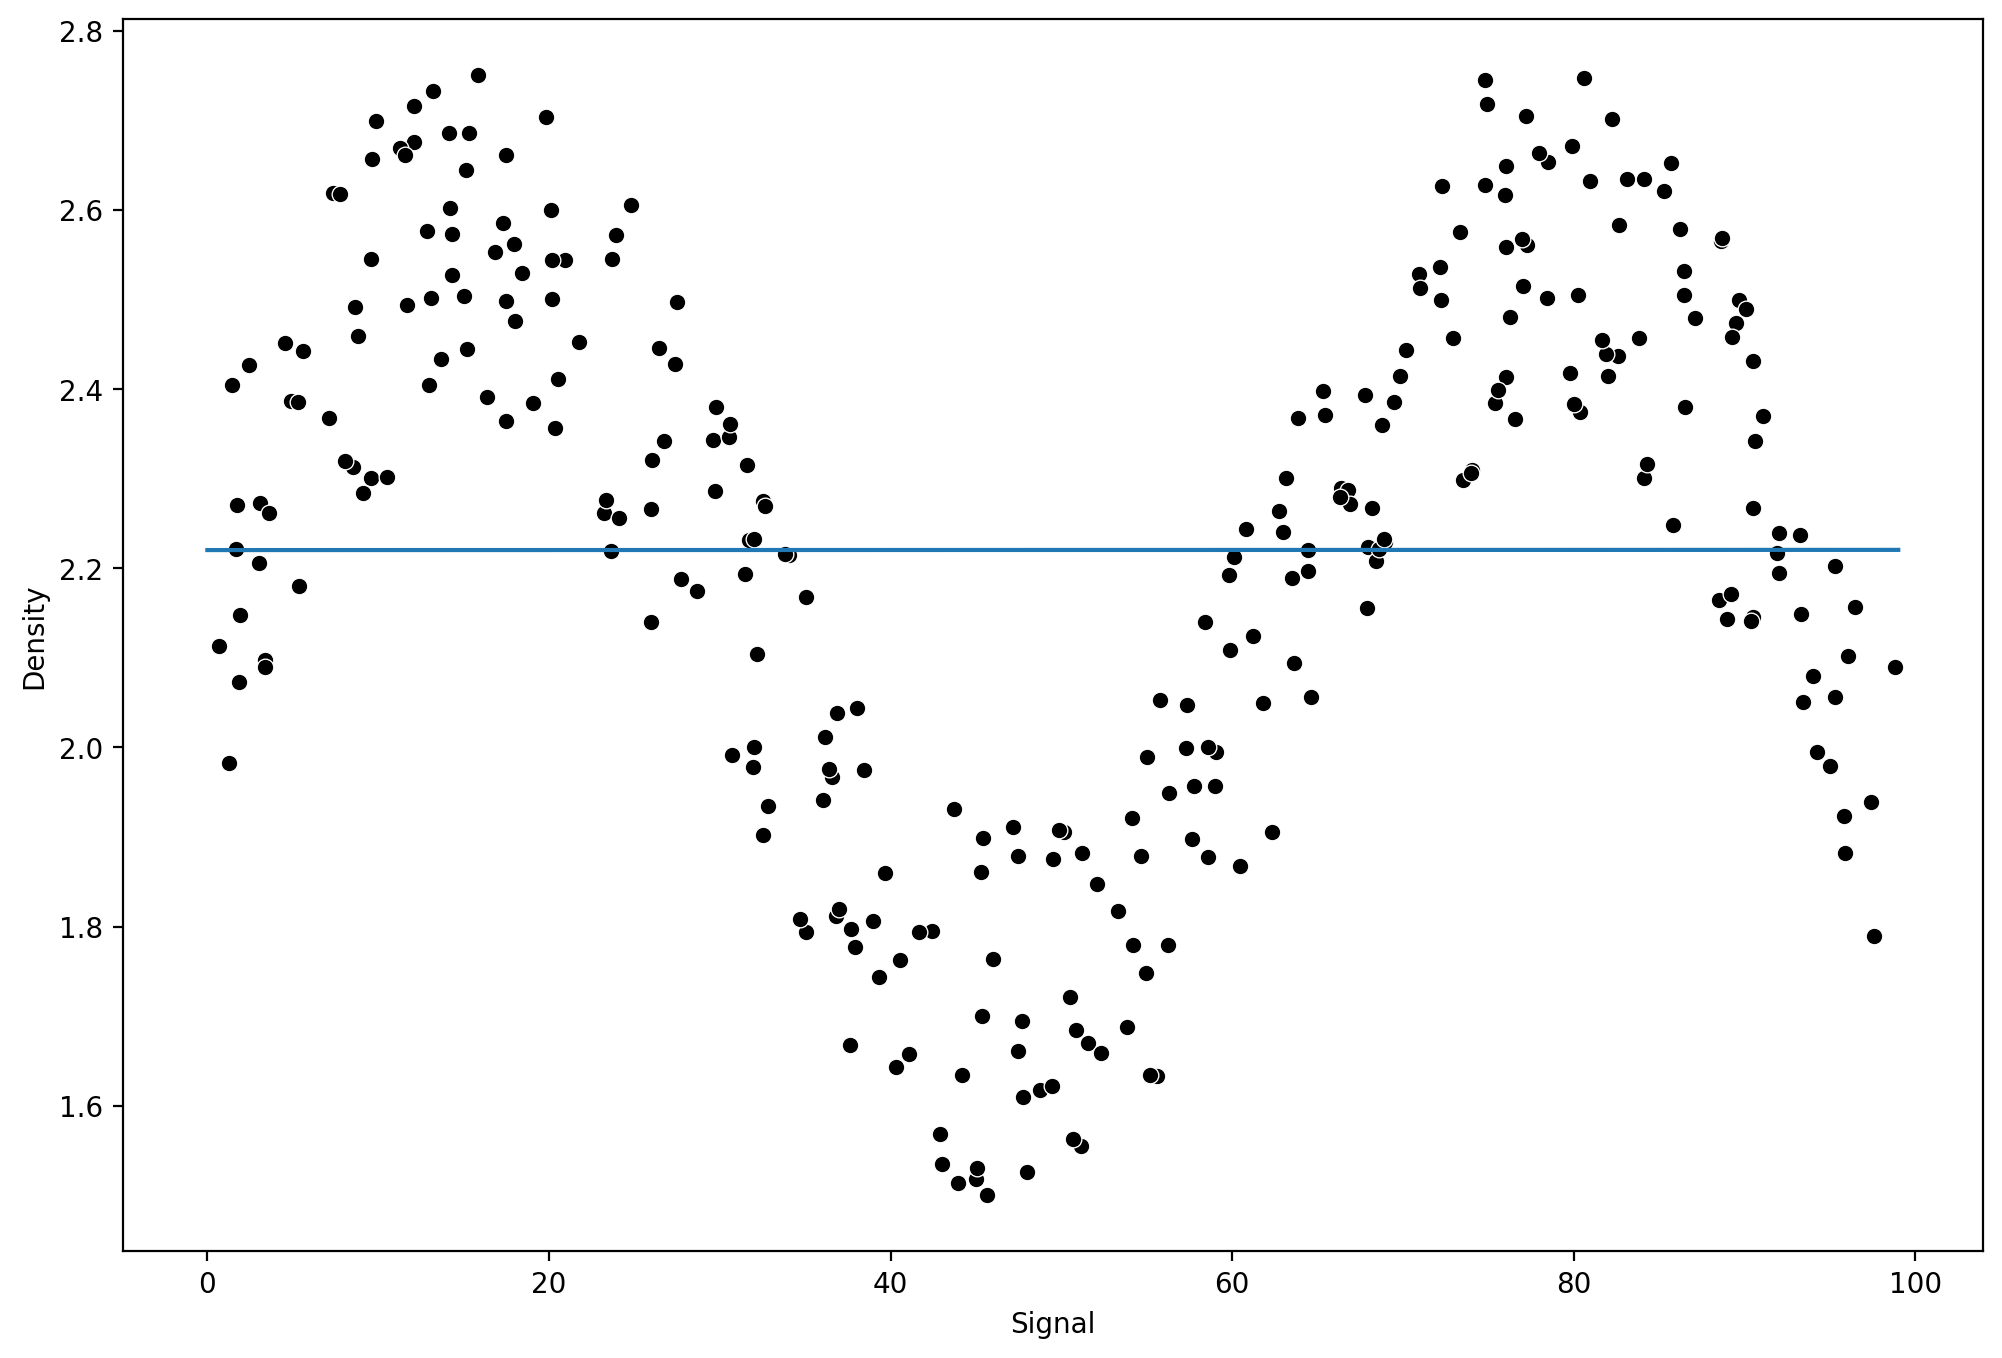

In [182]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [183]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [184]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


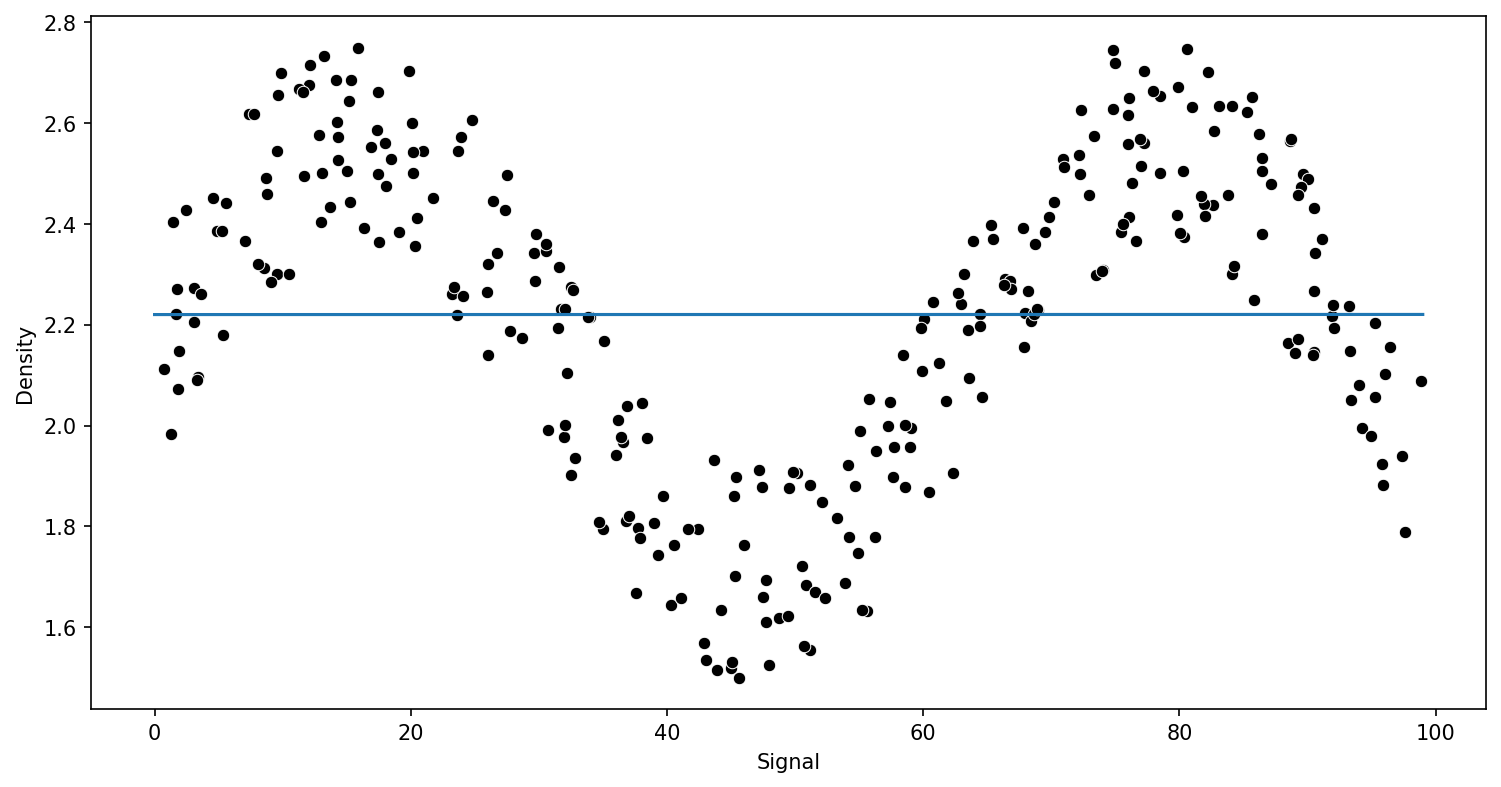

In [185]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [186]:
from sklearn.pipeline import make_pipeline

In [187]:
from sklearn.preprocessing import PolynomialFeatures

In [188]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.2817309563725596


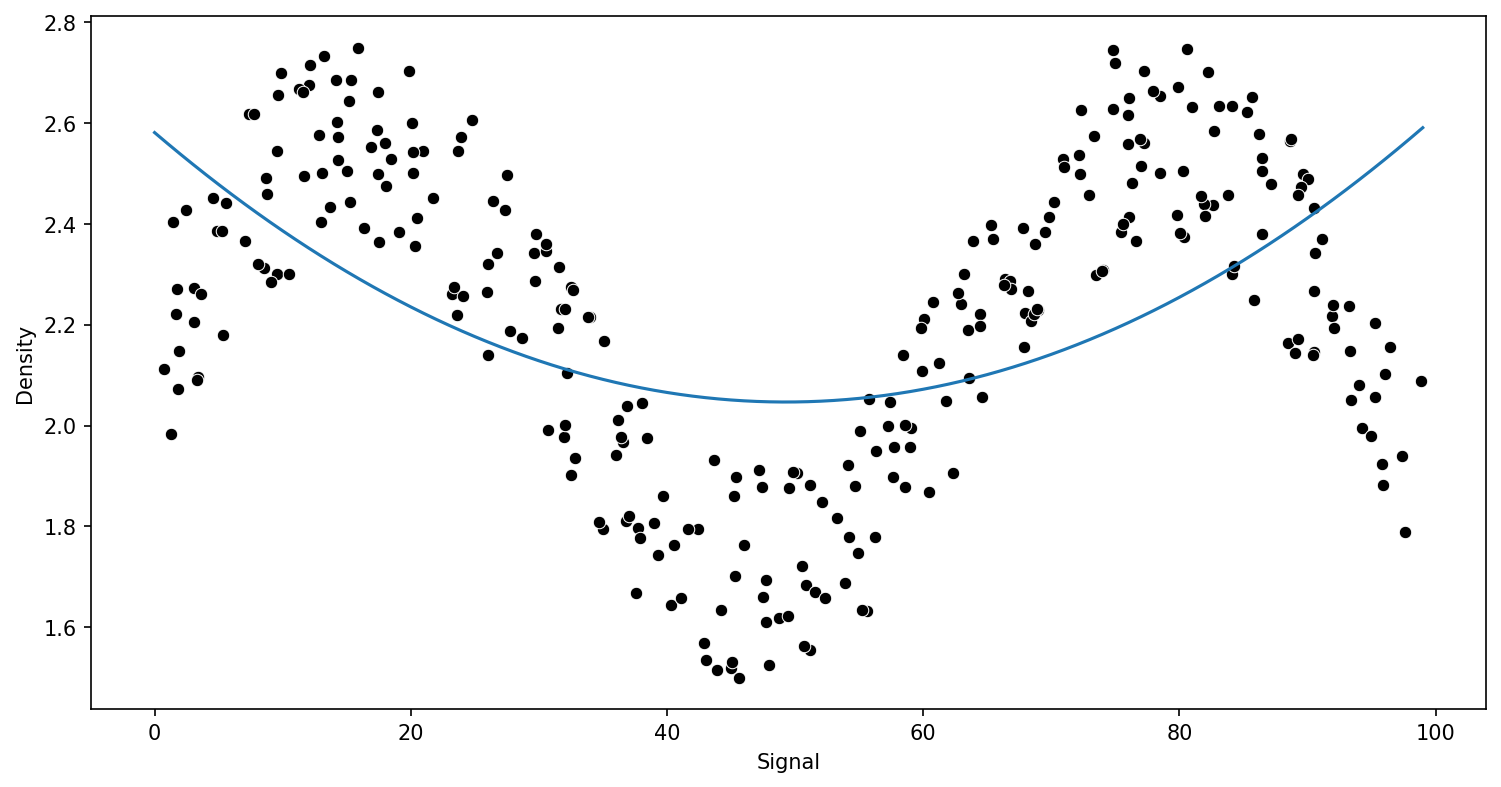

In [189]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

RMSE : 0.14078766602049042


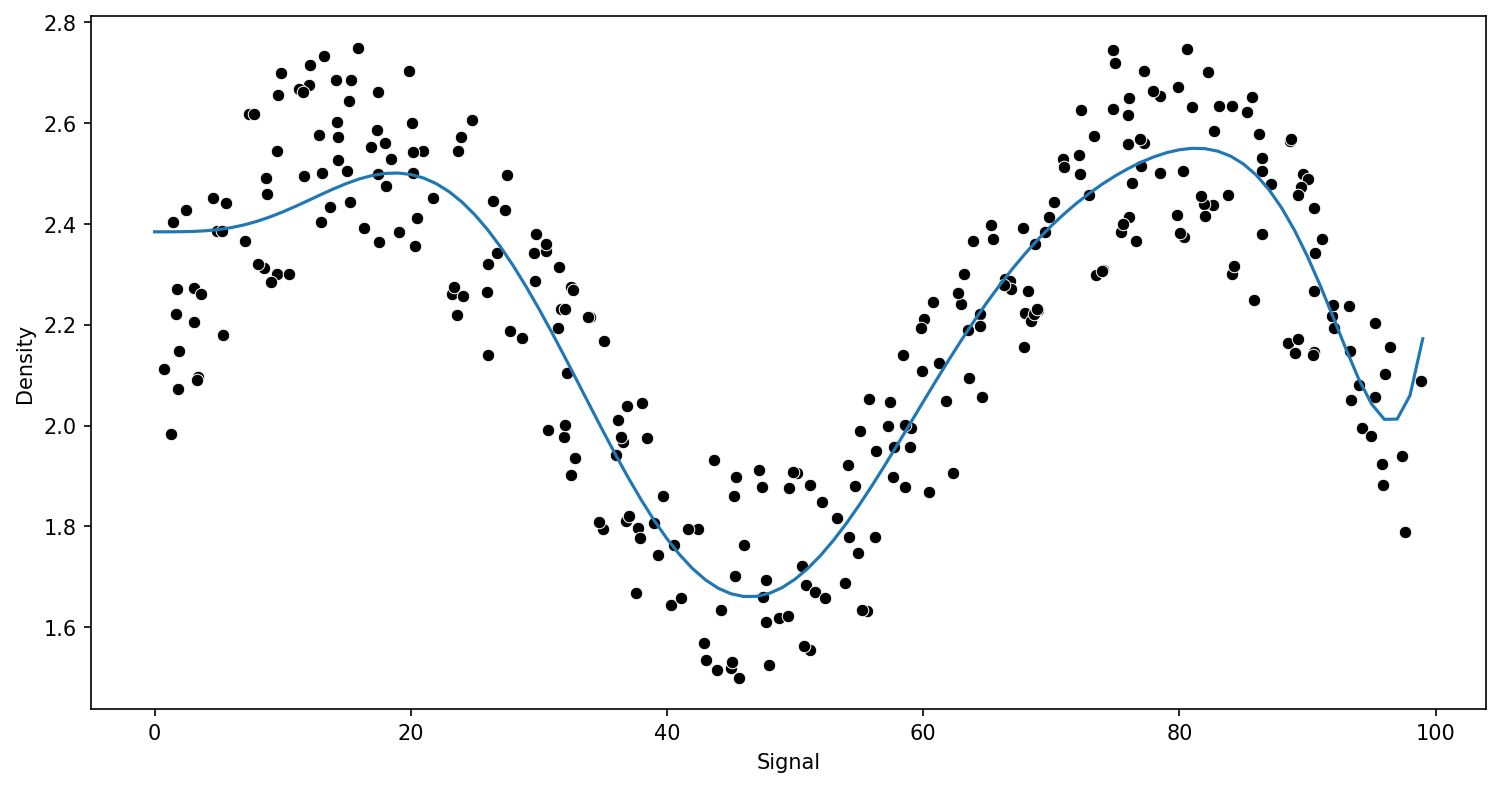

In [190]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [191]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


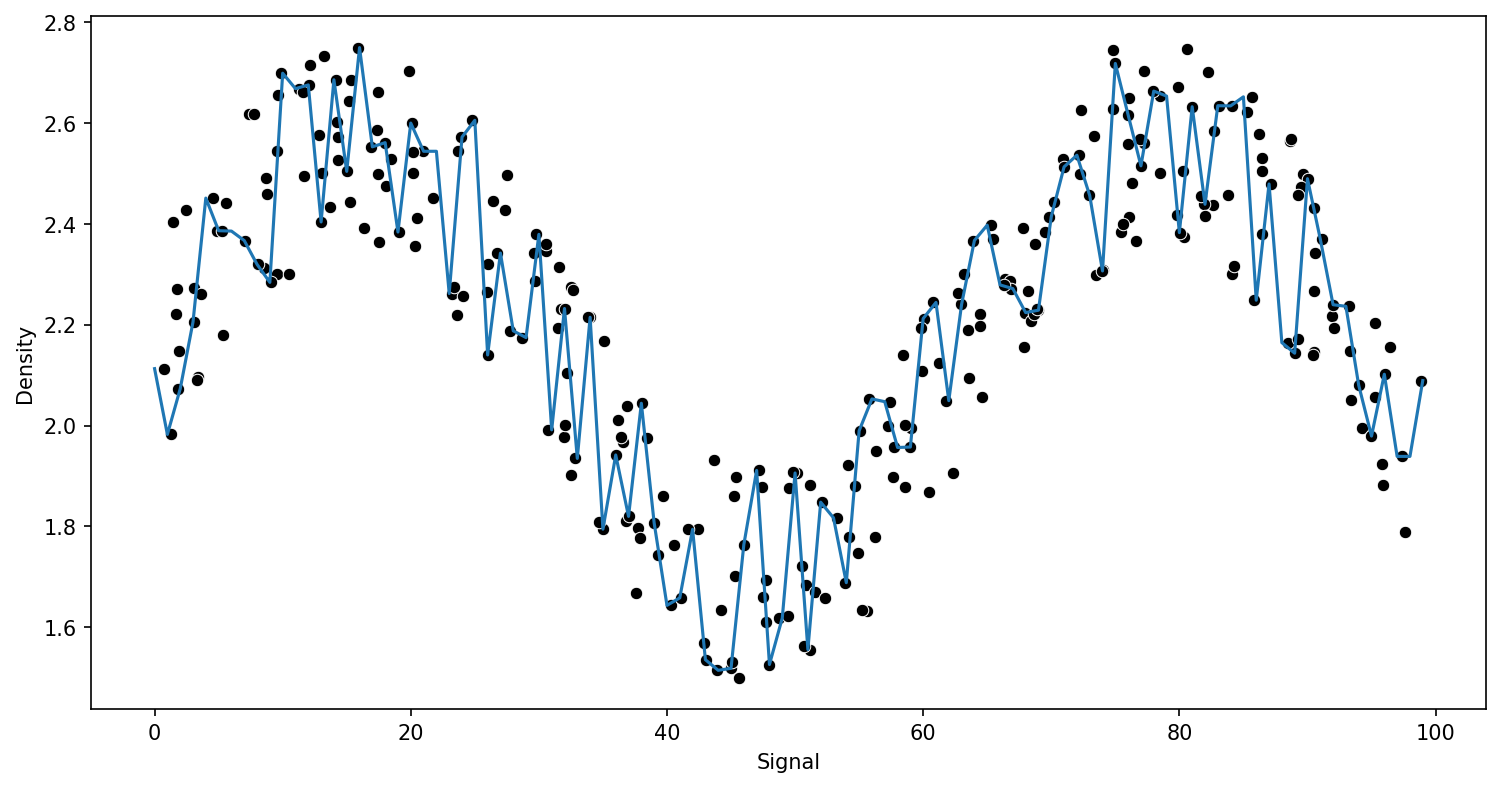

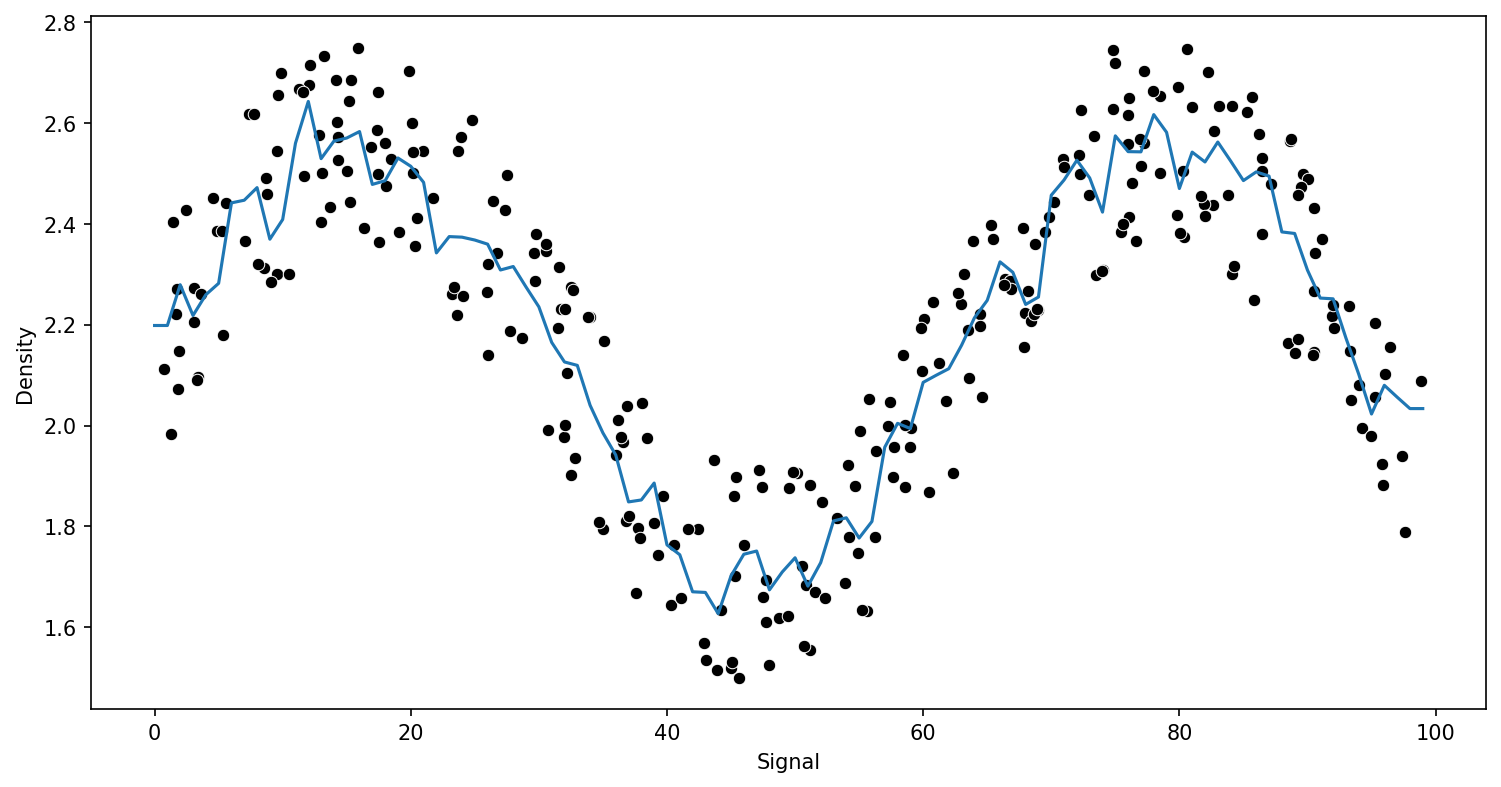

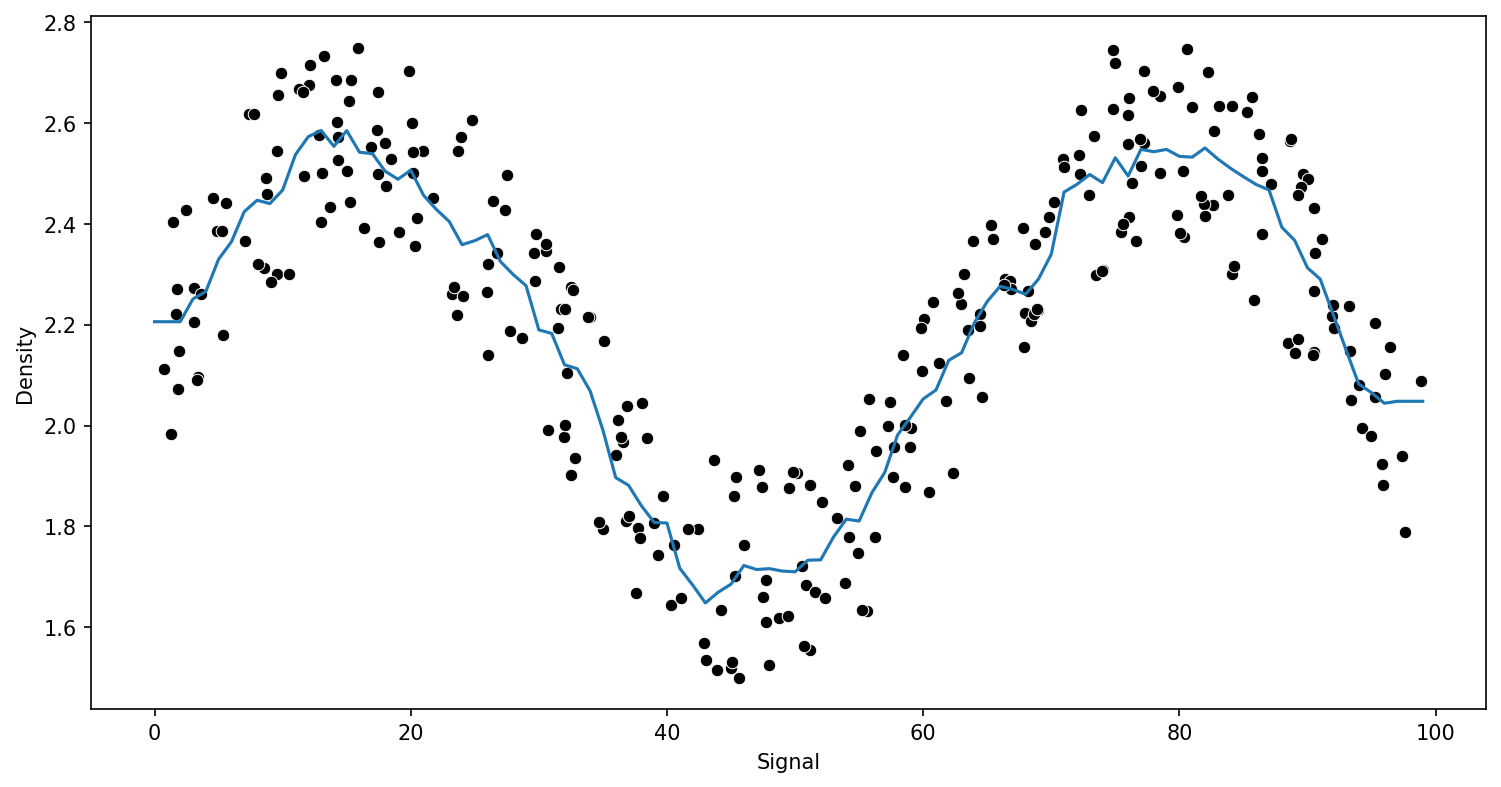

In [192]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [193]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


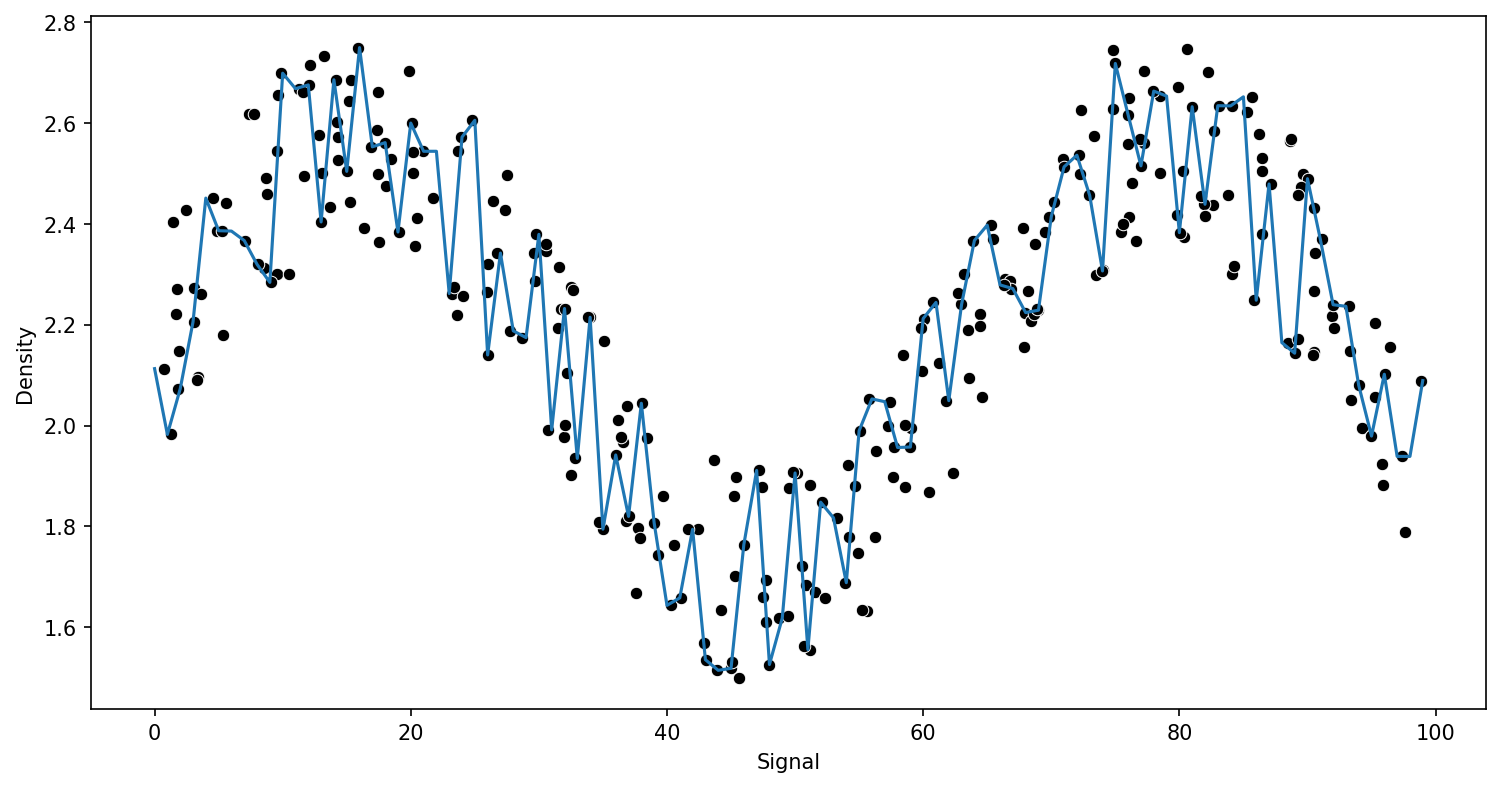

In [194]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [195]:
model.get_n_leaves()

270

----

## Support Vector Regression

In [196]:
from sklearn.svm import SVR

In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [199]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302047557


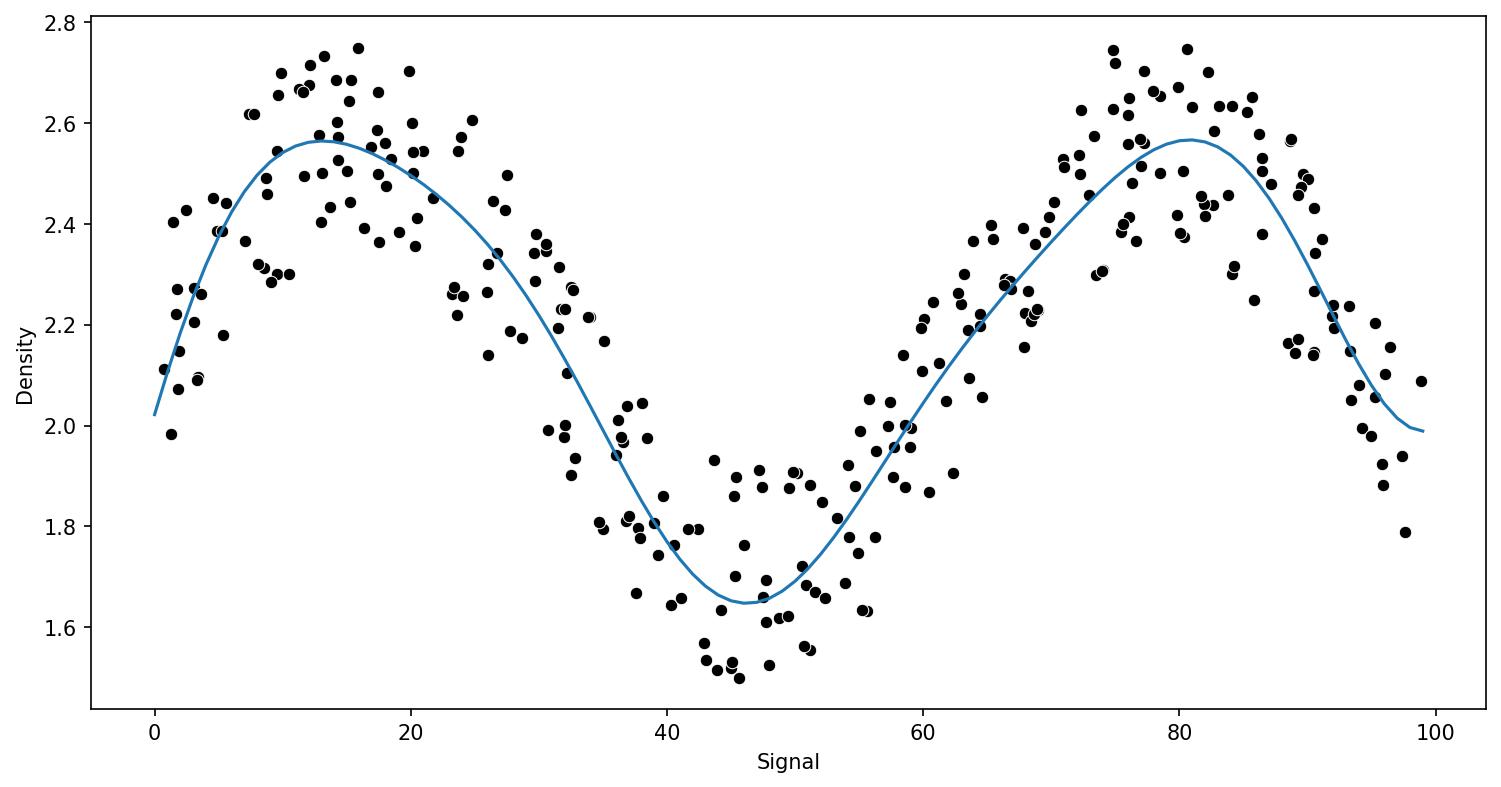

In [200]:
run_model(grid,X_train,y_train,X_test,y_test)

In [201]:
grid.best_estimator_

SVR(C=1000)

---

## Random Forest Regression

In [202]:
from sklearn.ensemble import RandomForestRegressor

In [203]:
# help(RandomForestRegressor)

RMSE : 0.140189670383089
RMSE : 0.13983716754991726
RMSE : 0.13365854520463308


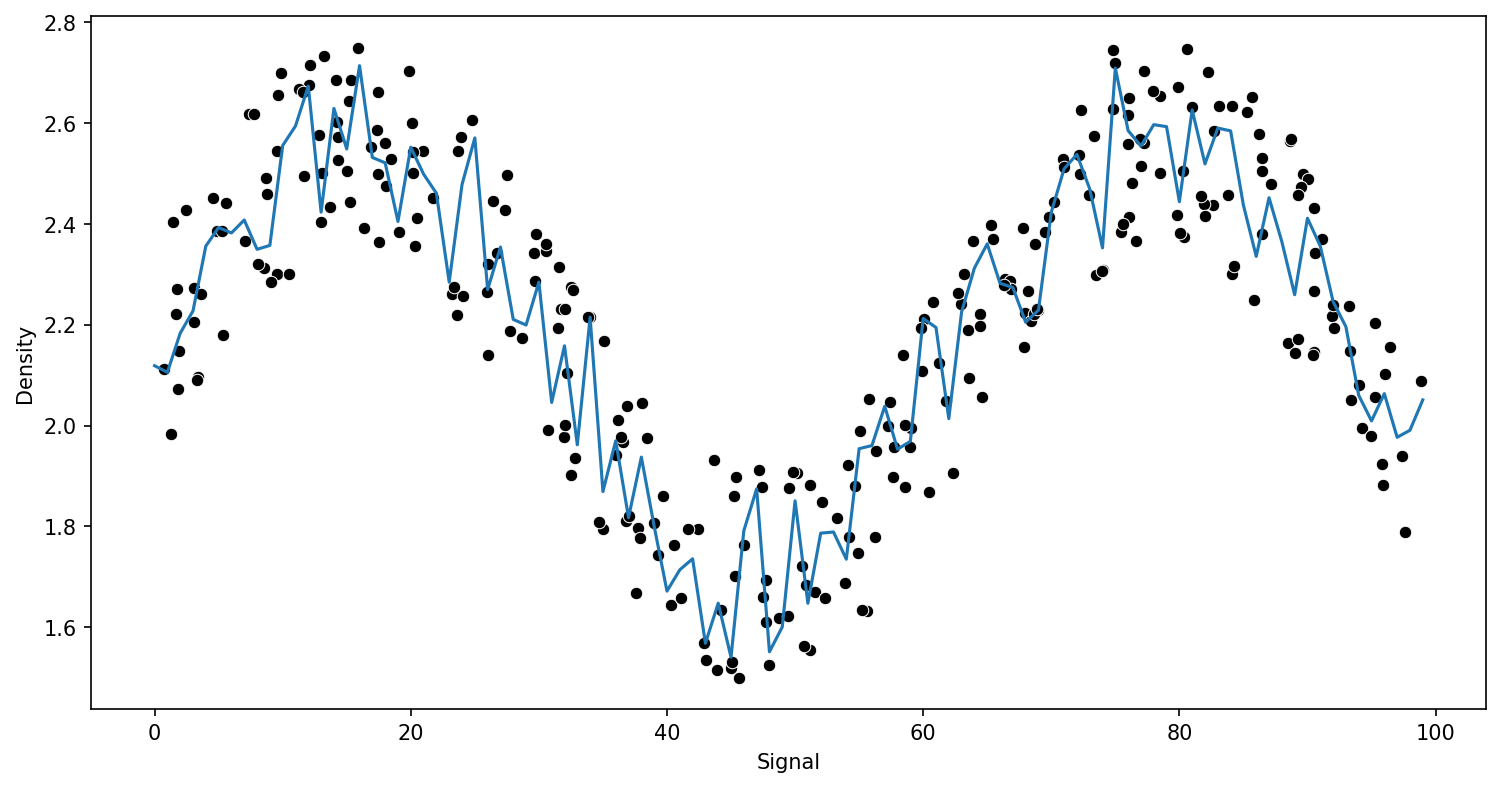

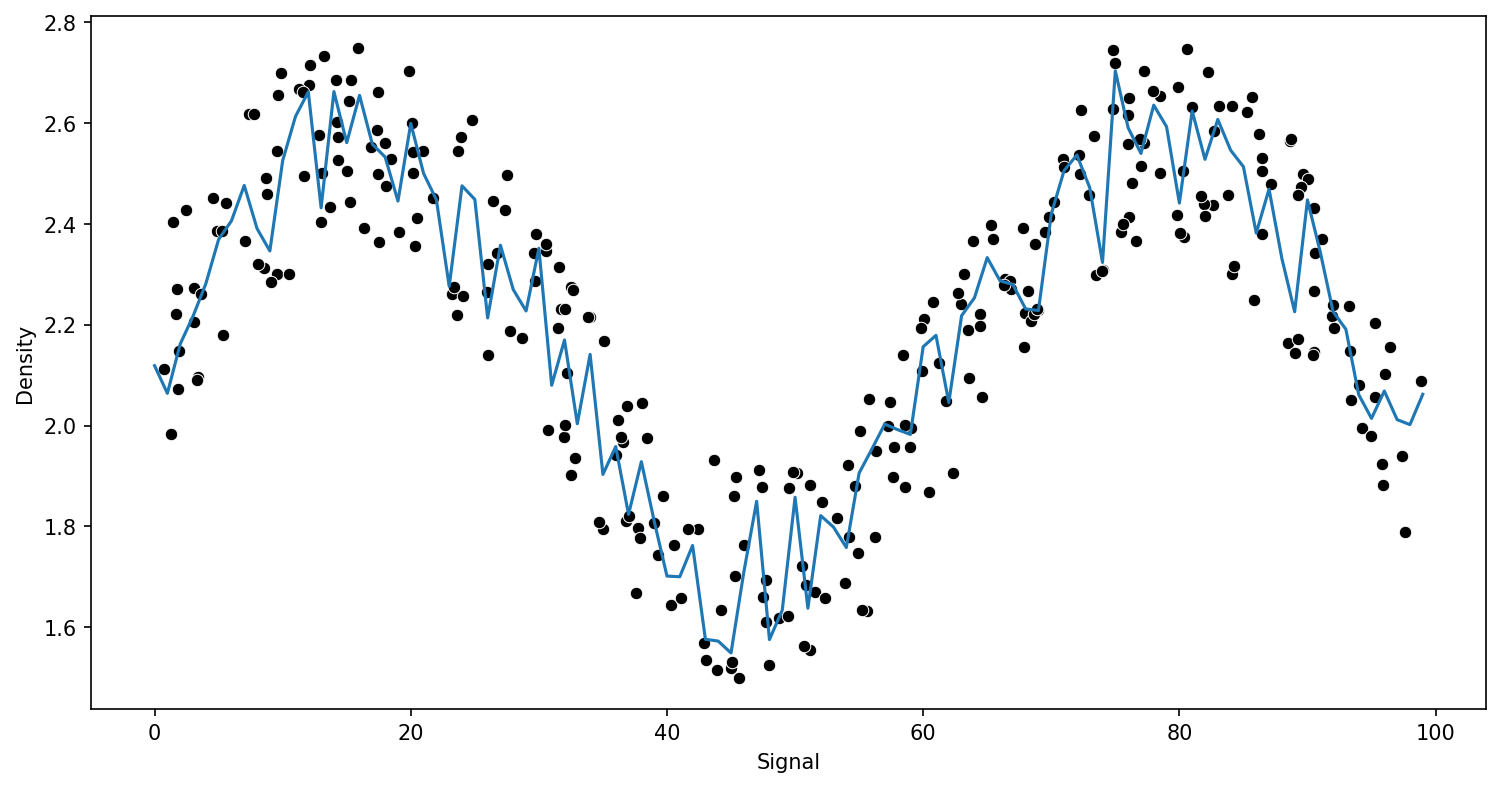

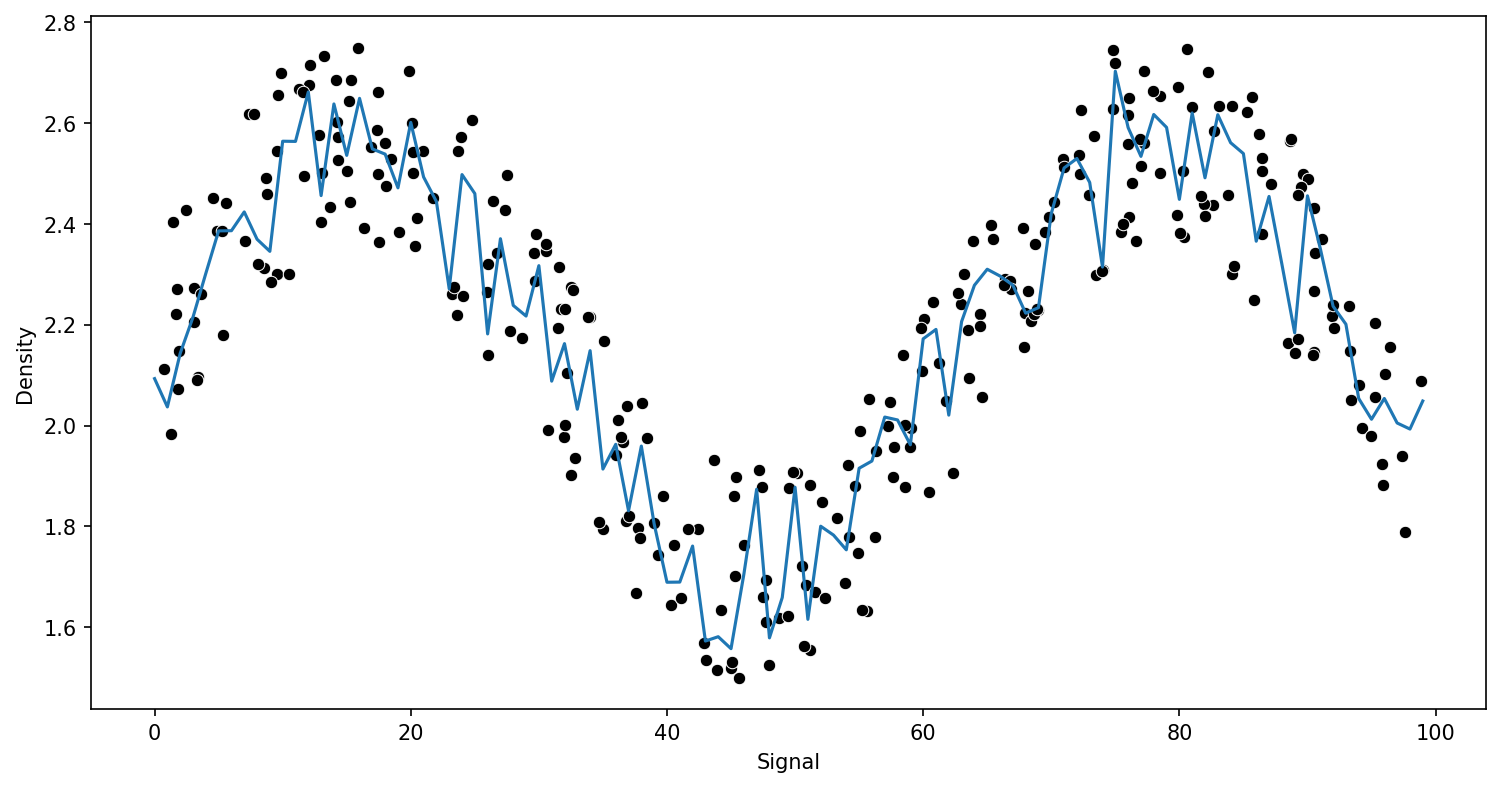

In [204]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [205]:
from sklearn.ensemble import GradientBoostingRegressor

In [206]:
# help(GradientBoostingRegressor)

RMSE : 0.13294148649584667


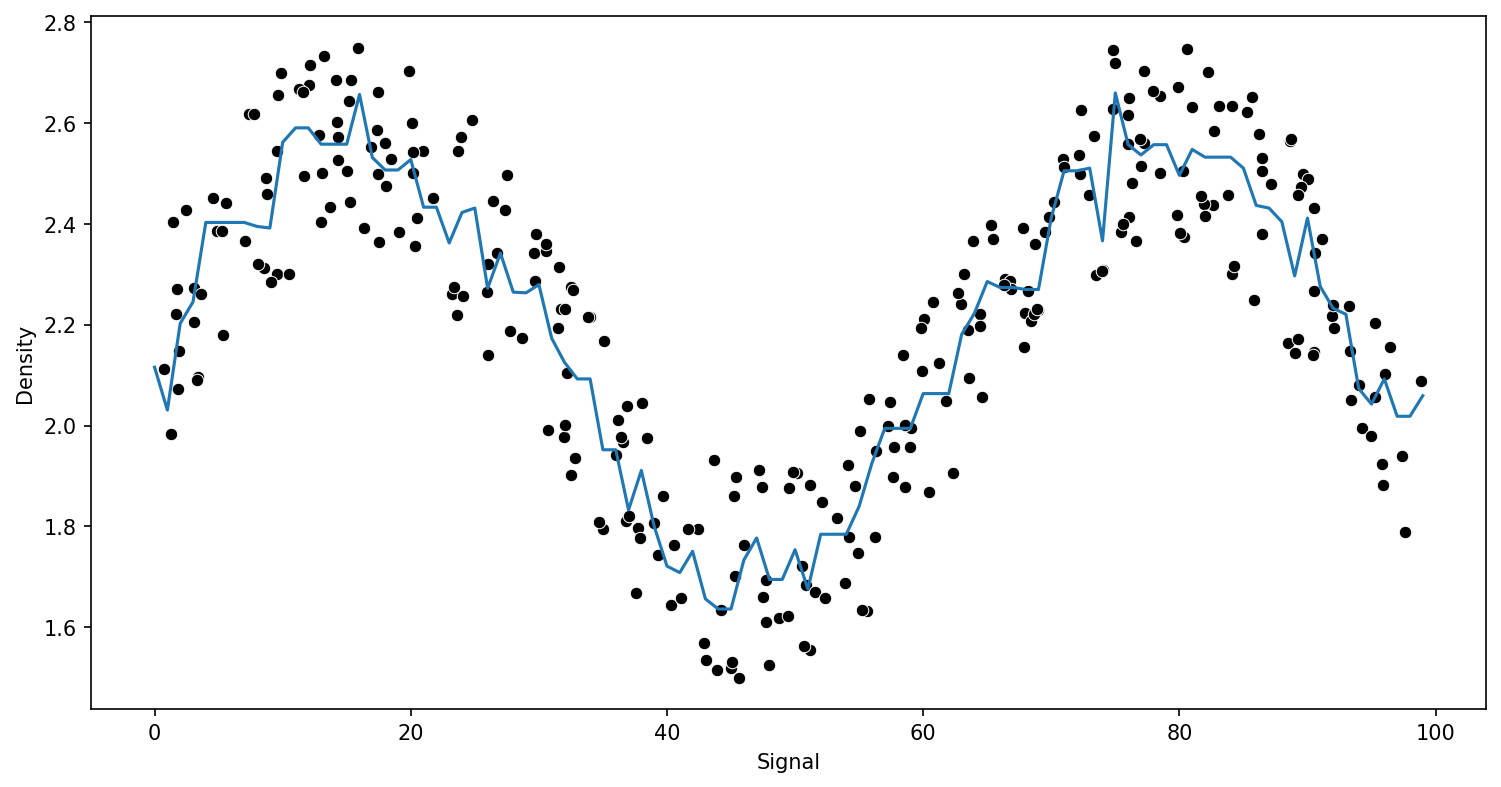

In [207]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [208]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.1384067781074527


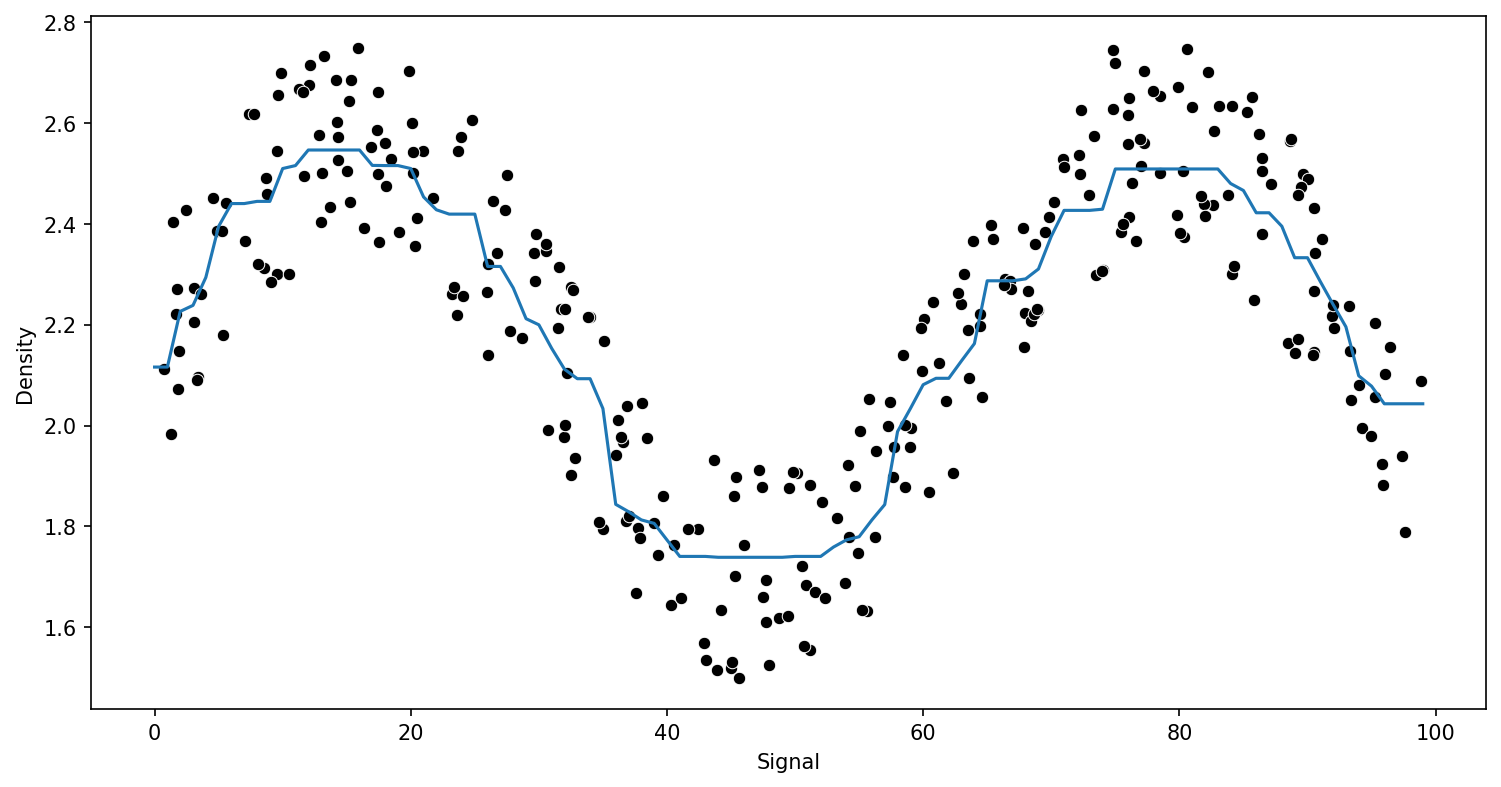

In [298]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----